<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleF_20_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20.1 Numerical Differentiation Problem Statement

A function can be represented by a numerical grid, which is a set of points evenly distributed over the domain of the function. This is often defined over a specific interval. The distance between adjacent points on the grid is defined as the spacing or step size. We use x, to represent the numerical grid and xj to the be jth point on the grid. The step size or spacing is represented by h.

Python can show the function as a discrete or discretized representation which is helpful when searching for numerical calculations. For data that is gathered in engineering and science practice, only a few discrete points may be known from the function value. A good example of this is temperature. The temperature in a room is continuous, but a sensor will only take readings at discrete intervals of time.

# 20.2 Finite Difference Approximating Derivatives

The following equation is the derivative f'(x) of the function f(x) at a point where x = a:

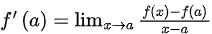

Taking the derivative of the function at the given point x = a, will find the slope at the given point. To use the finite difference approximation of the slope, we will use values of the function that are close to the point x = a. There are three variations of the finite difference formula, as seem below.

Forward difference is used to estimate the slow of the function at the jth point on the numerical grid to the adjacent point after it. (i.e. the line connecting (xj, f(xj)) and (xj+1, f(xj+1)):

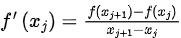

Backward difference will estimate the slope at the point xj by using the line which connects the adjacent point before xj and xj:

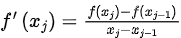

Central difference will estimate the slope at the point xj by using a line that connects the adjacent point before xj and the adjacent point after xj:

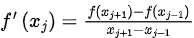

**Finite Difference Approximating Derivatives with Taylor Series**

If we want to derive an approximation for the derivative of f(x), we can also use the Taylor series.

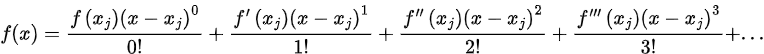

**Example**  Consider the function f(x) = sin(x). We know the derivative of sin(x) = cos(x).

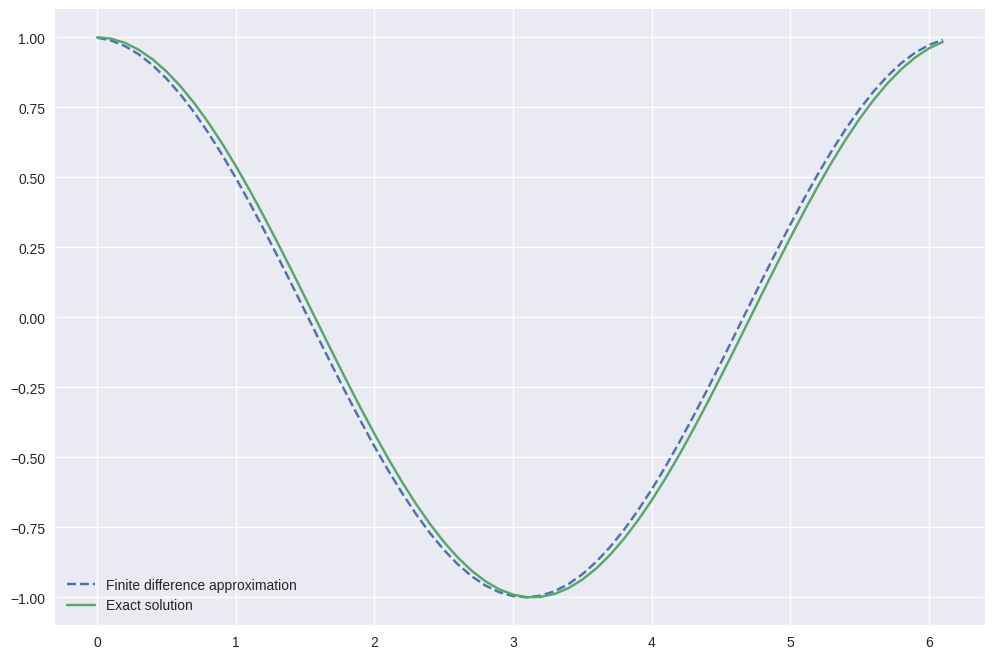

0.04997515074549317


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

# step size
h = 0.1
# define grid
x = np.arange(0, 2*np.pi, h)
#compute function
y = np.sin(x)

# compute vector of forward differences
foward_diff = np.diff(y)/h
# compute corresponding grid
x_diff = x[:-1:]
# compute exact solution
exact_solution = np.cos(x_diff)

# Plot solution
plt.figure(figsize = (12, 8))
plt.plot(x_diff, foward_diff, '--', \
         label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, \
         label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between
# numerical derivative and exact solution
max_error = max(abs(exact_solution - foward_diff))
print(max_error)


As seen in the graph, there is a small difference between both curves. This is due to the numerical error in evaluating the numerical derivatives. The error is of the magnitude of 0.05 and will decrease with smaller step sizes.

**Example**  The following code computes the numerical derivative of f(x) = sin(x) using the foward difference formula for decreasing step sizes, h. It then plots the maximum error between the approximated derivative and the true derivative versus h as shown in the generated figure.

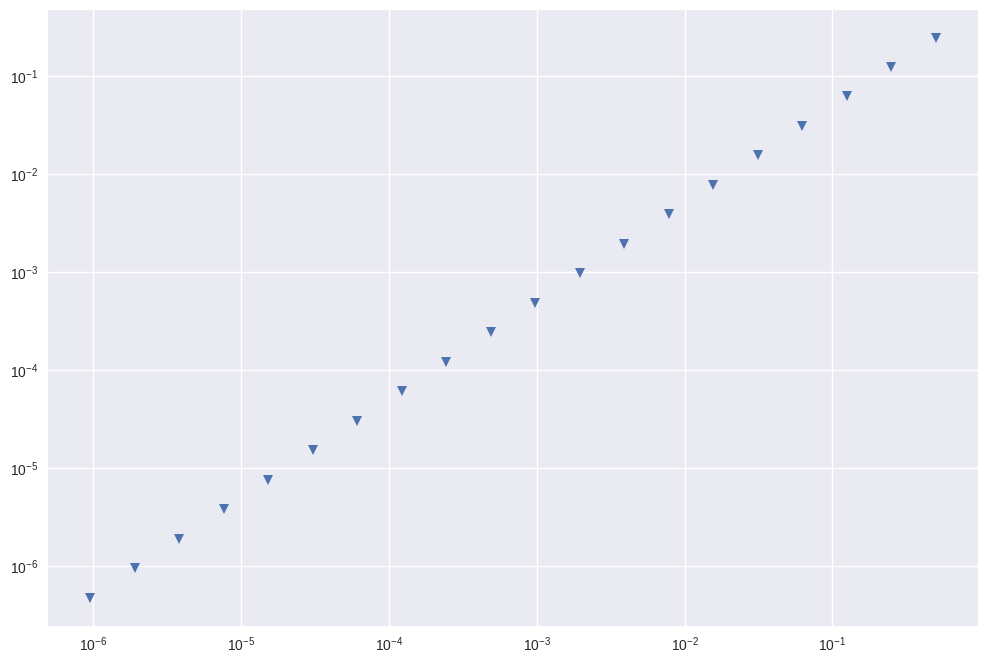

In [2]:
# define step size
h = 1
# define number of iterations to perform
iterations = 20
# list to store our step sizes
step_size = []
# list to store max error for each step size
max_error = []

for i in range(iterations):
    # halve the step size
    h /= 2
    # store this step size
    step_size.append(h)
    # compute new grid
    x = np.arange(0, 2*np.pi, h)
    # compute function value at grid
    y = np.sin(x)
    # compute vector of forward differences
    foward_diff = np.diff(y)/h
    # compute corresponding grid
    x_diff = x[:-1]
    # compute exact solution
    exact_solution = np.cos(x_diff)

    # Compute max error between
    # numerical derivative and exact solution
    max_error.append(\
                     max(abs(exact_solution - foward_diff)))

# produce log-log plot of max error versus step size
plt.figure(figsize = (12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()

# 20.3 Approximating of Higher Order Derivatives

The Taylor series can also approximate higher order derivatives, such as second and third derivatives.

We can take the Taylor series where a = xj, then using x = xj-1 and x = xj+1. This will give us:
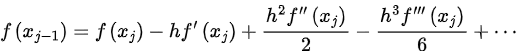

and

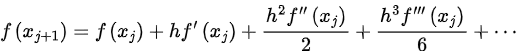

After we add both equations together we will get:
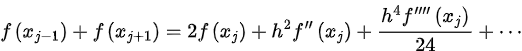

Through simplification we will arrive at the following equation:
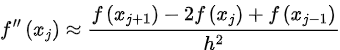

Which is of the order 2.